<a href="https://colab.research.google.com/github/ShreePurvaja/Data-Science-Notes/blob/main/Traffic_Police_data_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('/content/3. Police Data.csv')

In [4]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
df.dtypes

,0
stop_date,object
stop_time,object
country_name,float64
driver_gender,object
driver_age_raw,float64
driver_age,float64
driver_race,object
violation_raw,object
violation,object
search_conducted,bool


# **Convert stop date and stop time from object to date and time**

In [9]:
df['stop_time']=pd.to_datetime(df['stop_time'])
df['stop_date']=pd.to_datetime(df['stop_date'])

In [10]:
df.dtypes

,0
stop_date,datetime64[ns]
stop_time,datetime64[ns]
country_name,float64
driver_gender,object
driver_age_raw,float64
driver_age,float64
driver_race,object
violation_raw,object
violation,object
search_conducted,bool


# **Search conducted for each age group for male and female**

In [14]:
pd.pivot_table(df, index=['driver_gender', 'violation'],values=['driver_age','driver_age_raw','drugs_related_stop','search_conducted'])


driver_age  driver_age_raw  \
driver_gender violation                                         
F             Equipment             31.470588     1977.091039   
              Moving violation      34.001872     1971.832400   
              Other                 34.073009     1966.455947   
              Registration/plates   32.610143     1973.362342   
              Speeding              32.164394     1973.645644   
M             Equipment             31.740857     1975.620508   
              Moving violation      37.336482     1964.068275   
              Other                 41.302149     1904.604986   
              Registration/plates   32.674953     1973.813160   
              Seat belt             30.333333     1981.666667   
              Speeding              33.765928     1971.522593   

                                   drugs_related_stop  search_conducted  
driver_gender violation                                                  
F             Equipment                      0.007880          0.058739  
              Moving violation               0.008870          0.043417  
              Other                          0.006608          0.057269  
              Registration/plates            0.004747          0.099684  
              Speeding                       0.001711          0.008728  
M             Equipment                      0.023633          0.089258  
              Moving violation               0.014002          0.061018  
              Other                          0.005433          0.044423  
              Registration/plates            0.017381          0.140286  
              Seat belt                      0.000000          0.000000  
              Speeding                       0.006231          0.027198

# Min,Max average age of female anf female for each violation and how many cases on the basis of violation

In [18]:
pd.pivot_table(df, index=['driver_gender', 'violation'],values=['driver_age'],aggfunc=[np.min,np.max,np.mean,len])

<ipython-input-18-b60b466594d8>:1: FutureWarning: The provided callable <function min at 0x7987e99cd4e0> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  pd.pivot_table(df, index=['driver_gender', 'violation'],values=['driver_age'],aggfunc=[np.min,np.max,np.mean,len])
<ipython-input-18-b60b466594d8>:1: FutureWarning: The provided callable <function max at 0x7987e99cd3a0> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(df, index=['driver_gender', 'violation'],values=['driver_age'],aggfunc=[np.min,np.max,np.mean,len])
<ipython-input-18-b60b466594d8>:1: FutureWarning: The provided callable <function mean at 0x7987e99cdda0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be u

min        max       mean        len
                                  driver_age driver_age driver_age driver_age
driver_gender violation                                                      
F             Equipment                 16.0       73.0  31.470588       1396
              Moving violation          15.0       82.0  34.001872       2142
              Other                     17.0       73.0  34.073009        454
              Registration/plates       16.0       69.0  32.610143        632
              Speeding                  16.0       84.0  32.164394      11686
M             Equipment                 16.0       81.0  31.740857       5120
              Moving violation          15.0       86.0  37.336482       9784
              Other                     16.0       86.0  41.302149       3129
              Registration/plates       16.0       74.0  32.674953       1611
              Seat belt                 23.0       42.0  30.333333          3
              Speeding                  15.0       88.0  33.765928      25517

# **How many people arrested on each date**

In [20]:
df.groupby('stop_date')['is_arrested'].value_counts()

,,count
stop_date,is_arrested,
2005-01-02,False,1
2005-01-18,False,1
2005-01-23,False,1
2005-02-20,True,1
2005-03-14,False,1
...,...,...
2012-12-03,False,18
2012-12-04,False,25
2012-12-05,False,17


# **On which time police is more active**

In [21]:
df['stop_time'].mean()

Timestamp('2025-05-18 12:03:32.504463360')

# **How many males and female drivers are there in data**

In [22]:
df['driver_gender'].value_counts()

,count
driver_gender,
M,45164
F,16310


<Axes: xlabel='driver_gender'>

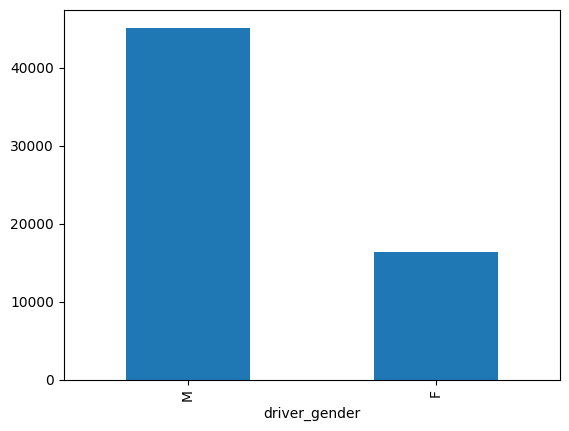

In [25]:
df['driver_gender'].value_counts().plot(kind='bar')

# **Find average ,min,max age for female and amle drivers**

In [26]:
df.groupby('driver_gender')['driver_age'].agg([np.min,np.max,np.mean])

<ipython-input-26-84c0aaf8c423>:1: FutureWarning: The provided callable <function min at 0x7987e99cd4e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('driver_gender')['driver_age'].agg([np.min,np.max,np.mean])
<ipython-input-26-84c0aaf8c423>:1: FutureWarning: The provided callable <function max at 0x7987e99cd3a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('driver_gender')['driver_age'].agg([np.min,np.max,np.mean])
<ipython-input-26-84c0aaf8c423>:1: FutureWarning: The provided callable <function mean at 0x7987e99cdda0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('driver_gende

,min,max,mean
driver_gender,,,
F,15.0,84.0,32.416528
M,15.0,88.0,34.777138


# **Who is more into the drug activity of male and female**

In [28]:
drug_data=df.groupby('driver_gender')['drugs_related_stop'].value_counts()
drug_data

driver_gender  drugs_related_stop
F              False                 16254
               True                     56
M              False                 44702
               True                    462
Name: count, dtype: int64

# **Extract true cases for male and female**

In [33]:
df.groupby('driver_gender').drugs_related_stop.sum()

,drugs_related_stop
driver_gender,
F,56
M,462


# **Total cases for true and false for drug related stop**

In [34]:
df.groupby('driver_gender').drugs_related_stop.value_counts()

driver_gender  drugs_related_stop
F              False                 16254
               True                     56
M              False                 44702
               True                    462
Name: count, dtype: int64

In [36]:
df['drugs_related_stop'].value_counts()

,count
drugs_related_stop,
False,65017
True,518


# **What type of action is taken by police for each date**

In [37]:
df.groupby('stop_date')['stop_outcome'].value_counts()

stop_date   stop_outcome 
2005-01-02  Citation          1
2005-01-18  Citation          1
2005-01-23  Citation          1
2005-02-20  Arrest Driver     1
2005-03-14  Citation          1
                             ..
2012-12-05  No Action         1
2012-12-06  Citation         26
            Warning           3
            N/D               1
2012-12-07  Citation          1
Name: count, Length: 5965, dtype: int64

# **How many times police gave warnings as stop outcome**

In [52]:
warning_data=df[df['stop_outcome']=='Warning']
warning_data

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
99,2005-10-03,2025-05-18 08:37:00,NaN,M,1965.0,40.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
108,2005-10-03,2025-05-18 17:00:00,NaN,M,1961.0,44.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,30+ Min,False
168,2005-10-06,2025-05-18 06:30:00,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
260,2005-10-09,2025-05-18 16:00:00,NaN,F,1978.0,27.0,Black,Registration Violation,Registration/plates,False,NaN,Warning,False,0-15 Min,False
281,2005-10-10,2025-05-18 12:05:00,NaN,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65490,2012-12-05,2025-05-18 10:46:00,NaN,M,1991.0,21.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
65499,2012-12-05,2025-05-18 23:13:00,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,True,Probable Cause,Warning,False,0-15 Min,True
65514,2012-12-06,2025-05-18 10:37:00,NaN,M,1988.0,24.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
65520,2012-12-06,2025-05-18 12:43:00,NaN,M,1953.0,59.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False


# **Warning cases for male and female**

In [53]:
warning_data.groupby('driver_gender').stop_outcome.value_counts()


,,count
driver_gender,stop_outcome,
F,Warning,517
M,Warning,1372


# **How many male and female are there for each violation**

In [57]:
pd.crosstab(df.driver_gender,df.violation,margins=True)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,All
driver_gender,,,,,,,
F,1396,2142,454,632,0,11686,16310
M,5120,9784,3129,1611,3,25517,45164
All,6516,11926,3583,2243,3,37203,61474


# **Data visualization for driver age**

<Axes: title={'center': 'driver_age'}, xlabel='driver_gender'>

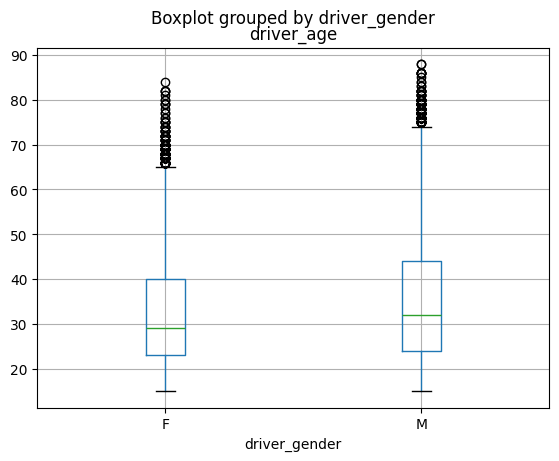

In [60]:
df.boxplot(column='driver_age',by='driver_gender')